Random User Profile
Name: Miss Sam Nelson
Email: sam.nelson@example.com
Location: Brighton and Hove, Merseyside, United Kingdom


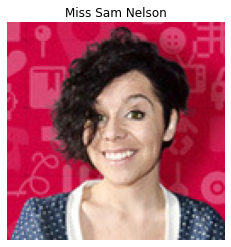

Data has been saved to output.txt
Random User Profile
Name: Mrs Juraci Ramos
Email: juraci.ramos@example.com
Location: São José dos Campos, Rio Grande do Sul, Brazil


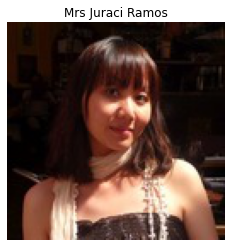

Data has been saved to output.txt
Random User Profile
Name: Ms Ellen Suomi
Email: ellen.suomi@example.com
Location: Jyväskylä, Päijät-Häme, Finland


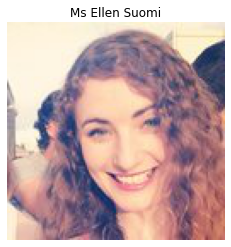

Data has been saved to output.txt
Random User Profile
Name: Ms Mary Meehan
Email: mary.meehan@example.com
Location: Letterkenny, Waterford, Ireland


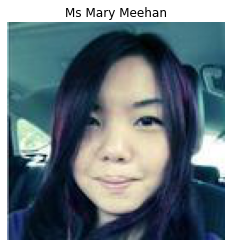

Data has been saved to output.txt
Random User Profile
Name: Mr Ege Alyanak
Email: ege.alyanak@example.com
Location: Manisa, Muş, Turkey


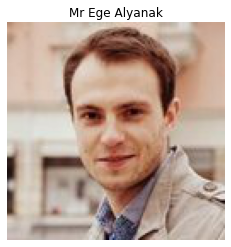

Data has been saved to output.txt


In [8]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO

def getuser():
     # Step 2: Make a request to the API
    response = requests.get(url)
    data = response.json()  # Parse the response as JSON

    # Step 3: Check if the request was successful
    if response.status_code == 200 and 'results' in data:
        user = data['results'][0]  # Retrieve the first user's data

        # Step 4: Extract relevant details
        name = f"{user['name']['title']} {user['name']['first']} {user['name']['last']}"
        email = user['email']
        location = f"{user['location']['city']}, {user['location']['state']}, {user['location']['country']}"
        profile_picture_url = user['picture']['large']

        # Step 5: Print the details
        print("Random User Profile")
        print("===================")
        print(f"Name: {name}")
        print(f"Email: {email}")
        print(f"Location: {location}")

        # Step 6: Display the profile picture using Matplotlib
        profile_picture_response = requests.get(profile_picture_url)
        img = mpimg.imread(BytesIO(profile_picture_response.content), format='jpeg')
        plt.imshow(img)
        plt.axis('off')
        plt.title(name)
        plt.show()
        
        return user

    else:
        print("Failed to retrieve data.")

def saveuser(user):

    # Specify the file path
    file_path = 'output.txt'

    # Open the file in write mode and save the data
    with open(file_path, 'a') as file:
        name = f"{user['name']['title']} {user['name']['first']} {user['name']['last']}"
        email = user['email']
        location = f"{user['location']['city']}, {user['location']['state']}, {user['location']['country']}"
        profile_picture_url = user['picture']['large']

        # Step 5: Save the details
        file.write("Random User Profile\n")
        file.write("===================\n")
        file.write(f"Name: {name}\n")
        file.write(f"Email: {email}\n")
        file.write(f"Location: {location}\n")

    print(f"Data has been saved to {file_path}")

        
# Step 1: Define the API endpoint
url = "https://randomuser.me/api/"
for count in range(5):
    user = getuser()
    saveuser(user)